LAB 1 Notebook Benedikt Gregor
20.01.2022
# Young's Modulus
<p>Some important equations:</p>
<p>E = stress/strain ; stress = F/A, strain = d_l/l</p>
2*pi*f = omega = sqrt((E*A)/(M*l))

<p><font size="4", ><em>To measure the Young's modulus we are going to employ two methods: Static and dynamic</em></font></p>
</br>
<em><font size ="4">This notebook is a hybrid of handwritten notes and code</font></em>
    <p>Notes were re-written here to make them legible for everyone who is not Benedikt Gregor</p>
    </br>
<div>
<b>Static setup</b>
<p>Wire measurements: 2.830m, 2.825m, 2.830m</p>
Two wires are hung straight down from the ceiling of the room one acting as a reference wire. </br>
The reference one has a bit of weight attached to it to keep it taught. The other wire has a plate attached which acts as a platform for more weights to be added. The ends of the wires are also connected so as to measure in reference to the reference wire how much the second wire is stretched. The plate which will hold the weights is also partially submerged in water to keep it still. Where both wires are connected at the bottom there is a bubble level to straighten the difference whith a micrometer so as to measure said stretching.</br>
</br>

<b>Procedure</b>

First we measure the thickness of the wire three times with a micrometer:</br>
0.53mm, 0.53mm, 0.53mm </br>
Very consistend with an error of +/- 0.005mm or half the smallest increment in this case. Human error can occur depending on how tightly the micrometer was squeezing the wire and by mistakes reading the scale. 
</br>
To ensure there are no kinks in the second wire (used for measuring) too, there will always be a a 1kg weight attached to the system. Then the connection between both wires is leveled out using the bubble level and the built-in micrometer.
<em>NOTE: The 1kg will be ignored so all declarations of weight on the system will disregard the initial 1kg</em>
</div>

<div>

</br>
Frist step: Taking the "zero" reading
</br>
Readings will be recorded in a list below. Afterwards some handwritten notes can be seen and then the code to work with the data.

</div>

In [114]:
import numpy as np
diam = np.array([0.53, 0.53, 0.53])
r = (np.average(diam)/2)/1000  # get radius and convert to m
Delta_r = 0.005/1000 # converting error to m

d_lraw = np.array([0.14, 0.16, 0.19, 0.265, 0.33, 0.41, 0.47, 0.54, 0.60, 0.69, 0.76, 0.84, 1.135, 1.475, 1.81, 2.15]) #raw readings from micrometer in mm
d_l = [e/1000 for e in d_lraw] # converting raw readings to m
l_error = 0.005/1000 # in mm (Half of smallest step) converted to m
length = np.average(np.array([2.830, 2.825, 2.830])) # in m
length_error = 0.005 # an assumption in m

#print(length)

h = 10e-5

def A(r):
    return np.pi*r**2

dAdr = (A(r + h) - A(r - h))/(2*h)
Delta_A = dAdr*Delta_r
print('The error in y is:', Delta_A)
print()
print('The final answer is:', A(r), '+/-', Delta_A, 'm^2')


The error in y is: 8.325220532012951e-09

The final answer is: 2.206183440983432e-07 +/- 8.325220532012951e-09 m^2


![ex 2.13](1.jpg)
![ex 2.13](2.jpg)
![ex 2.13](3.jpg)

The corresponding weights will also be recorded in a list. However, these weights will be the value of them as measured with a scale which has an error of +/- 0.01g. Variables will record the error.

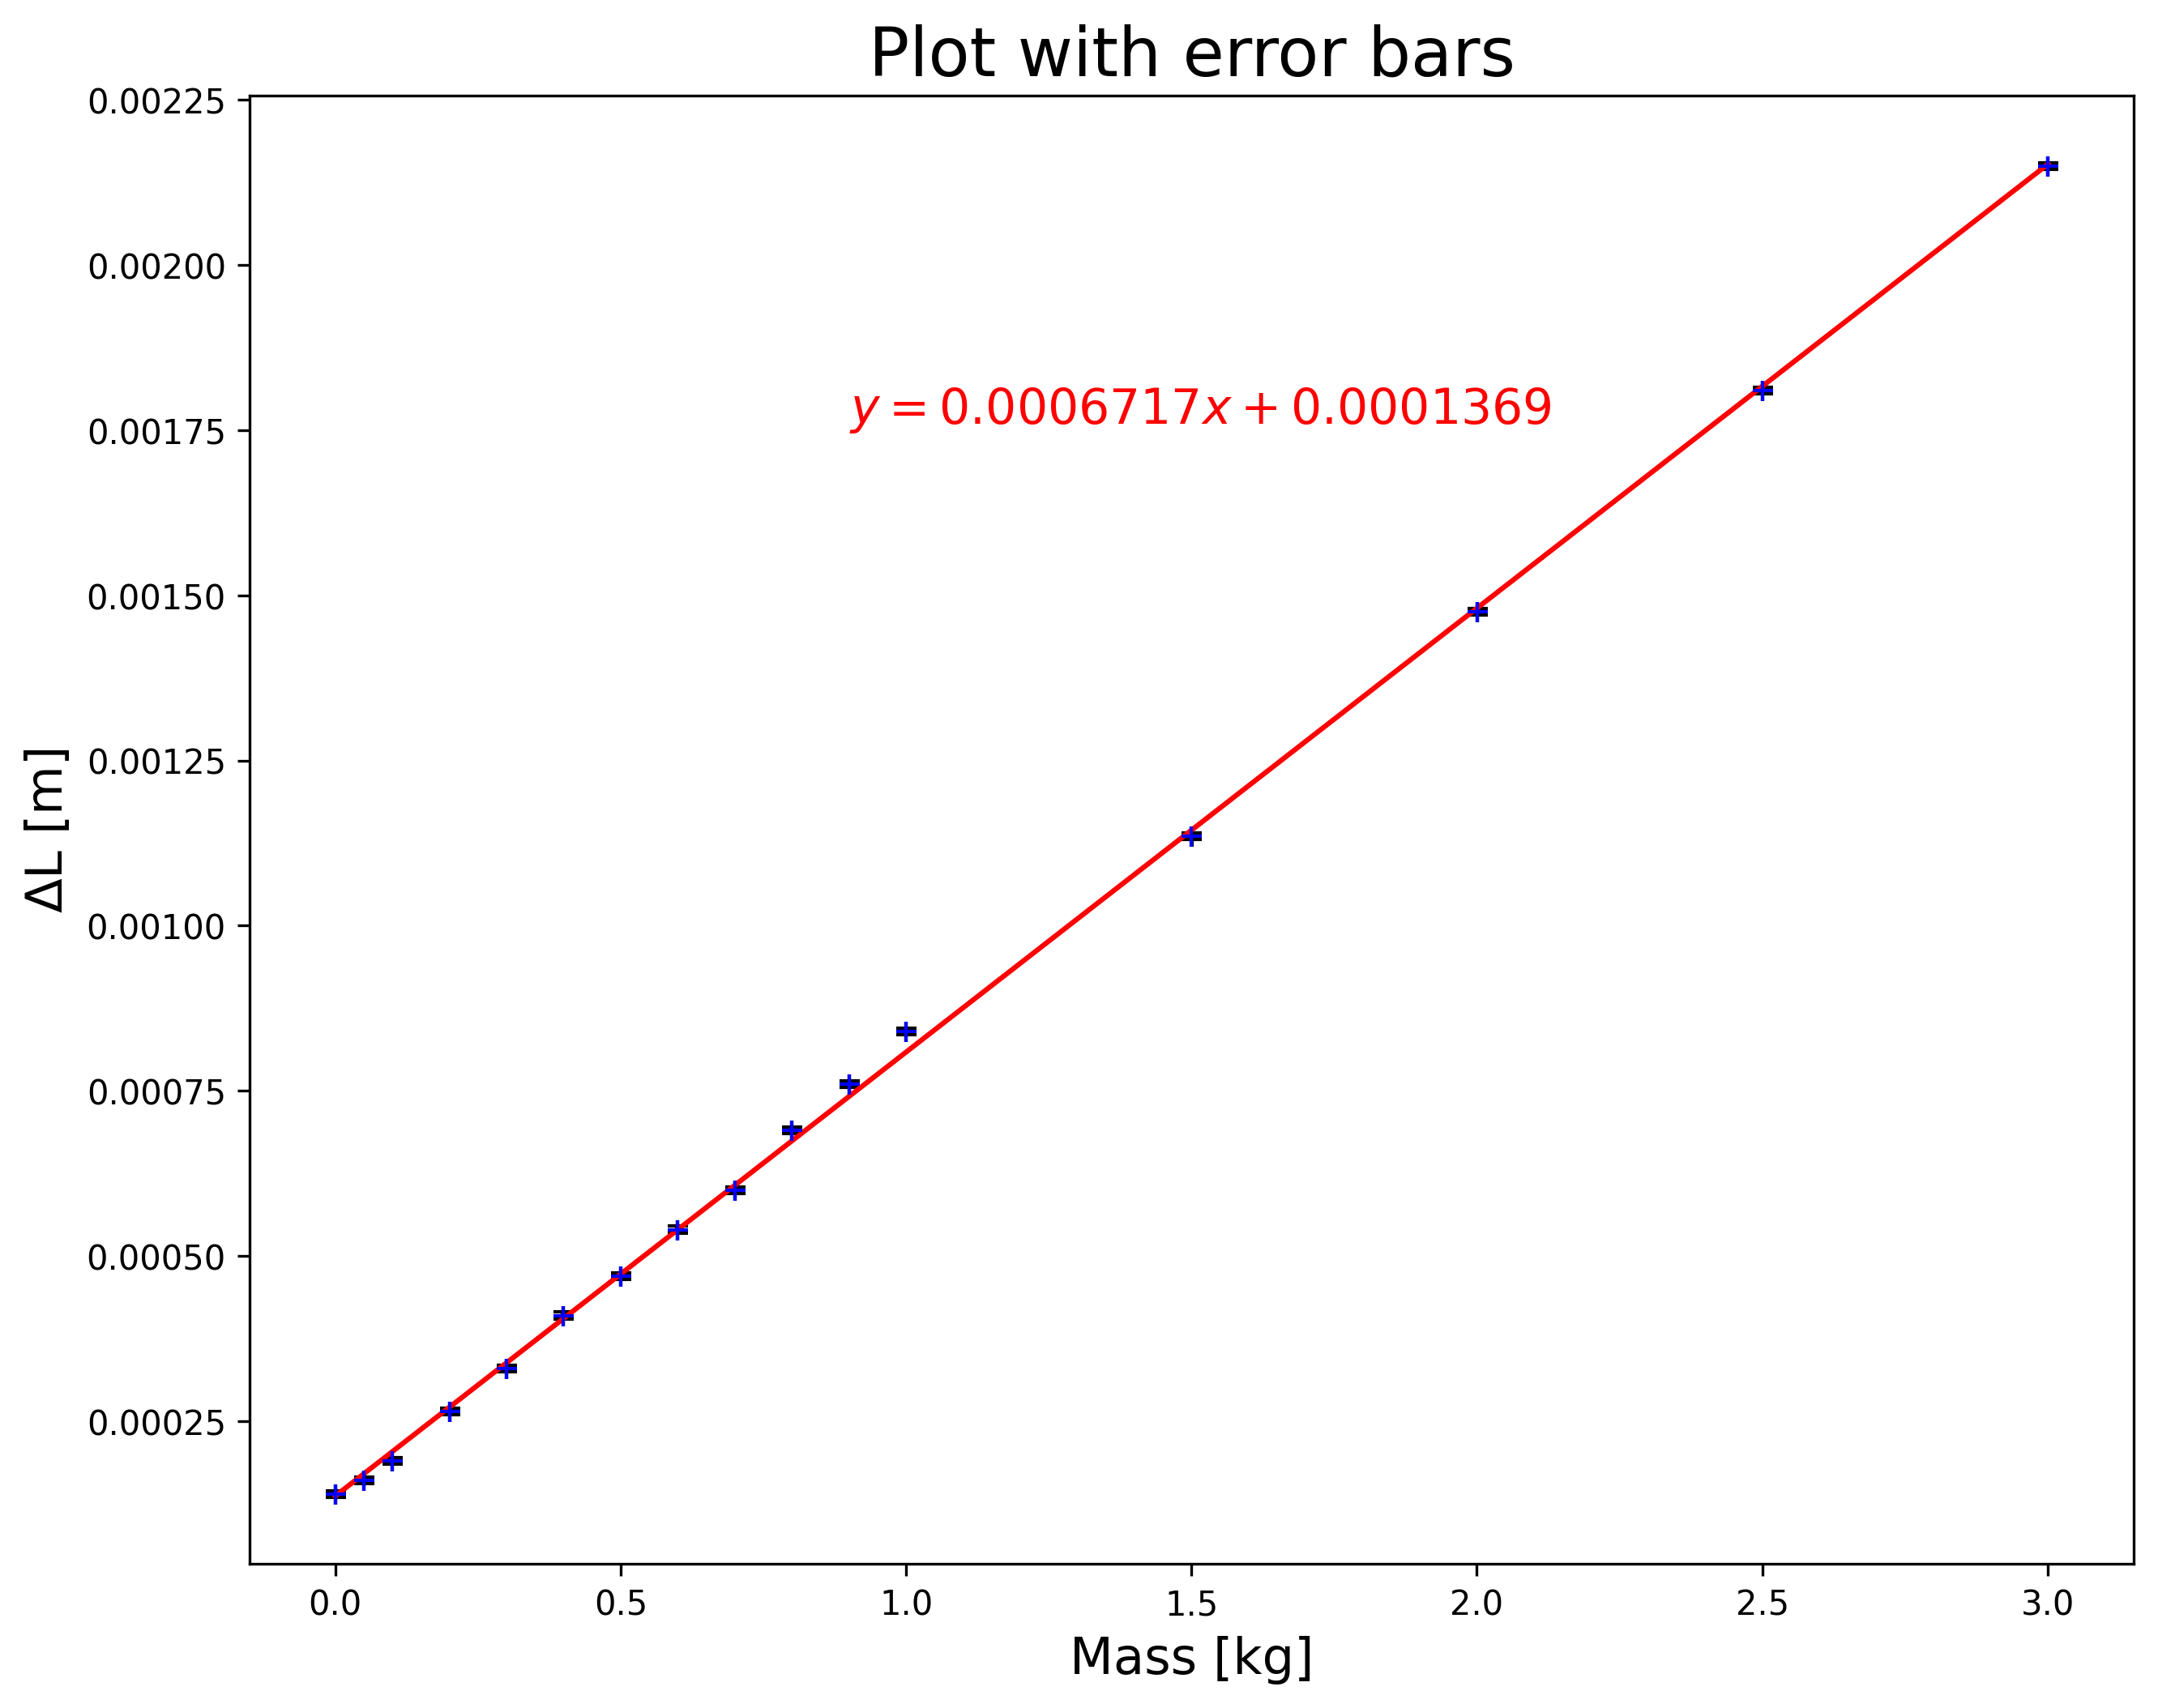

In [112]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# All measurements in gram and converting them to kg
fif = np.average(np.array([50.00, 50, 50.01, 50.01]))/1000
oneh = np.average(np.array([99.97, 99.97, 99.98]))/1000
twoh = np.average(np.array([199.93, 199.92, 199.92]))/1000
fivch = np.array([499.85, 499.96, 499.95]) # Not used in this lab
fivh = np.average(np.array([500.03, 500.02, 500.03]))/1000
thou = np.average(np.array([1000.31, 1000.30, 1000.28]))/1000
twou = np.average(np.array([2000.58, 2000.56, 2000.58]))/1000
w_error = 0.01/1000 # convert to kg

h = 10e-6

def y(a, b):
    return a + b

def dyda(a, b, h): return (y(a + h, b) - y(a - h, b))/(2*h)
def dydb(a, b, h): return (y(a, b + h) - y(a, b - h))/(2*h)

def Delta_y(dyda, dydb, Delta_a, Delta_b): return np.sqrt((dyda*Delta_a)**2+(dydb*Delta_b)**2)

# Calcualting more complicated errors for the weights
s5 = Delta_y(dyda(twoh, oneh, h), dydb(twoh, oneh, h), w_error, w_error)
s6 = Delta_y(dyda(twoh, twoh, h), dydb(twoh, twoh, h), w_error, w_error)
s8 = Delta_y(dyda(fivh, oneh, h), dydb(fivh, oneh, h), w_error, w_error)
s9 = Delta_y(dyda(fivh, twoh, h), dydb(fivh, twoh, h), w_error, w_error)
s10 = Delta_y(w_error, s5, w_error, w_error)
s11 = Delta_y(w_error, s6, w_error, w_error)
s13 = Delta_y(dyda(thou, fivh, h), dydb(thou, fivh, h), w_error, w_error)
s15 = Delta_y(dyda(twou, fivh, h), dydb(twou, fivh, h), w_error, w_error)
s16 = Delta_y(dyda(twou, thou, h), dydb(twou, thou, h), w_error, w_error)

X = np.array([0, fif, oneh, twoh, y(twoh, oneh), y(twoh, twoh), fivh, y(fivh, oneh), y(fivh, twoh), y(y(fivh, twoh), oneh), y(y(fivh, twoh), twoh), thou, y(thou, fivh), twou, y(twou, fivh), y(twou, thou)])
X_error = np.array([0, w_error, w_error, w_error, s5, s6, w_error, s8, s9, s10, s11, w_error, s13, w_error, s15, s16])
#print(X)
#print(X_error)

N = len(X)
Delta = N*sum(X**2)-(sum(X))**2

A = (sum(X**2)*sum(d_l)-sum(X)*sum(X*d_l))/Delta
B = (N*sum(X*d_l)-sum(X)*sum(d_l))/Delta

plt.figure(figsize=(10,8))

#Plot the points with error bars
plt.errorbar(X, d_l, yerr=l_error, xerr=X_error, fmt='b+', ecolor='k',capsize=3)

#plotting fitted line
plt.plot(X, A+B*X, 'r', label="Straight line fit")

plt.text(X[10], d_l[10]+0.001, f"$y={round(B, 7)}x+{round(A, 7)}$", color='r', size='x-large')
plt.title('Plot with error bars', fontsize=20)
plt.xlabel('Mass [kg]', fontsize=15)
plt.ylabel('$\Delta$L [m]', fontsize=15)
plt.show()

Rough first value of E using max weight and stretch

In [117]:
# Rough first calculation of E
F = X[15]*9.81
stress = F/A(r)
strain = d_l[15]/length
E = stress/strain
print("Modulus:")
print(round(E/1e9), "GPa")
#if "TypeError: 'numpy.float64' object is not callable" comes up just run first code cell again and then this one.

Modulus:
176 GPa


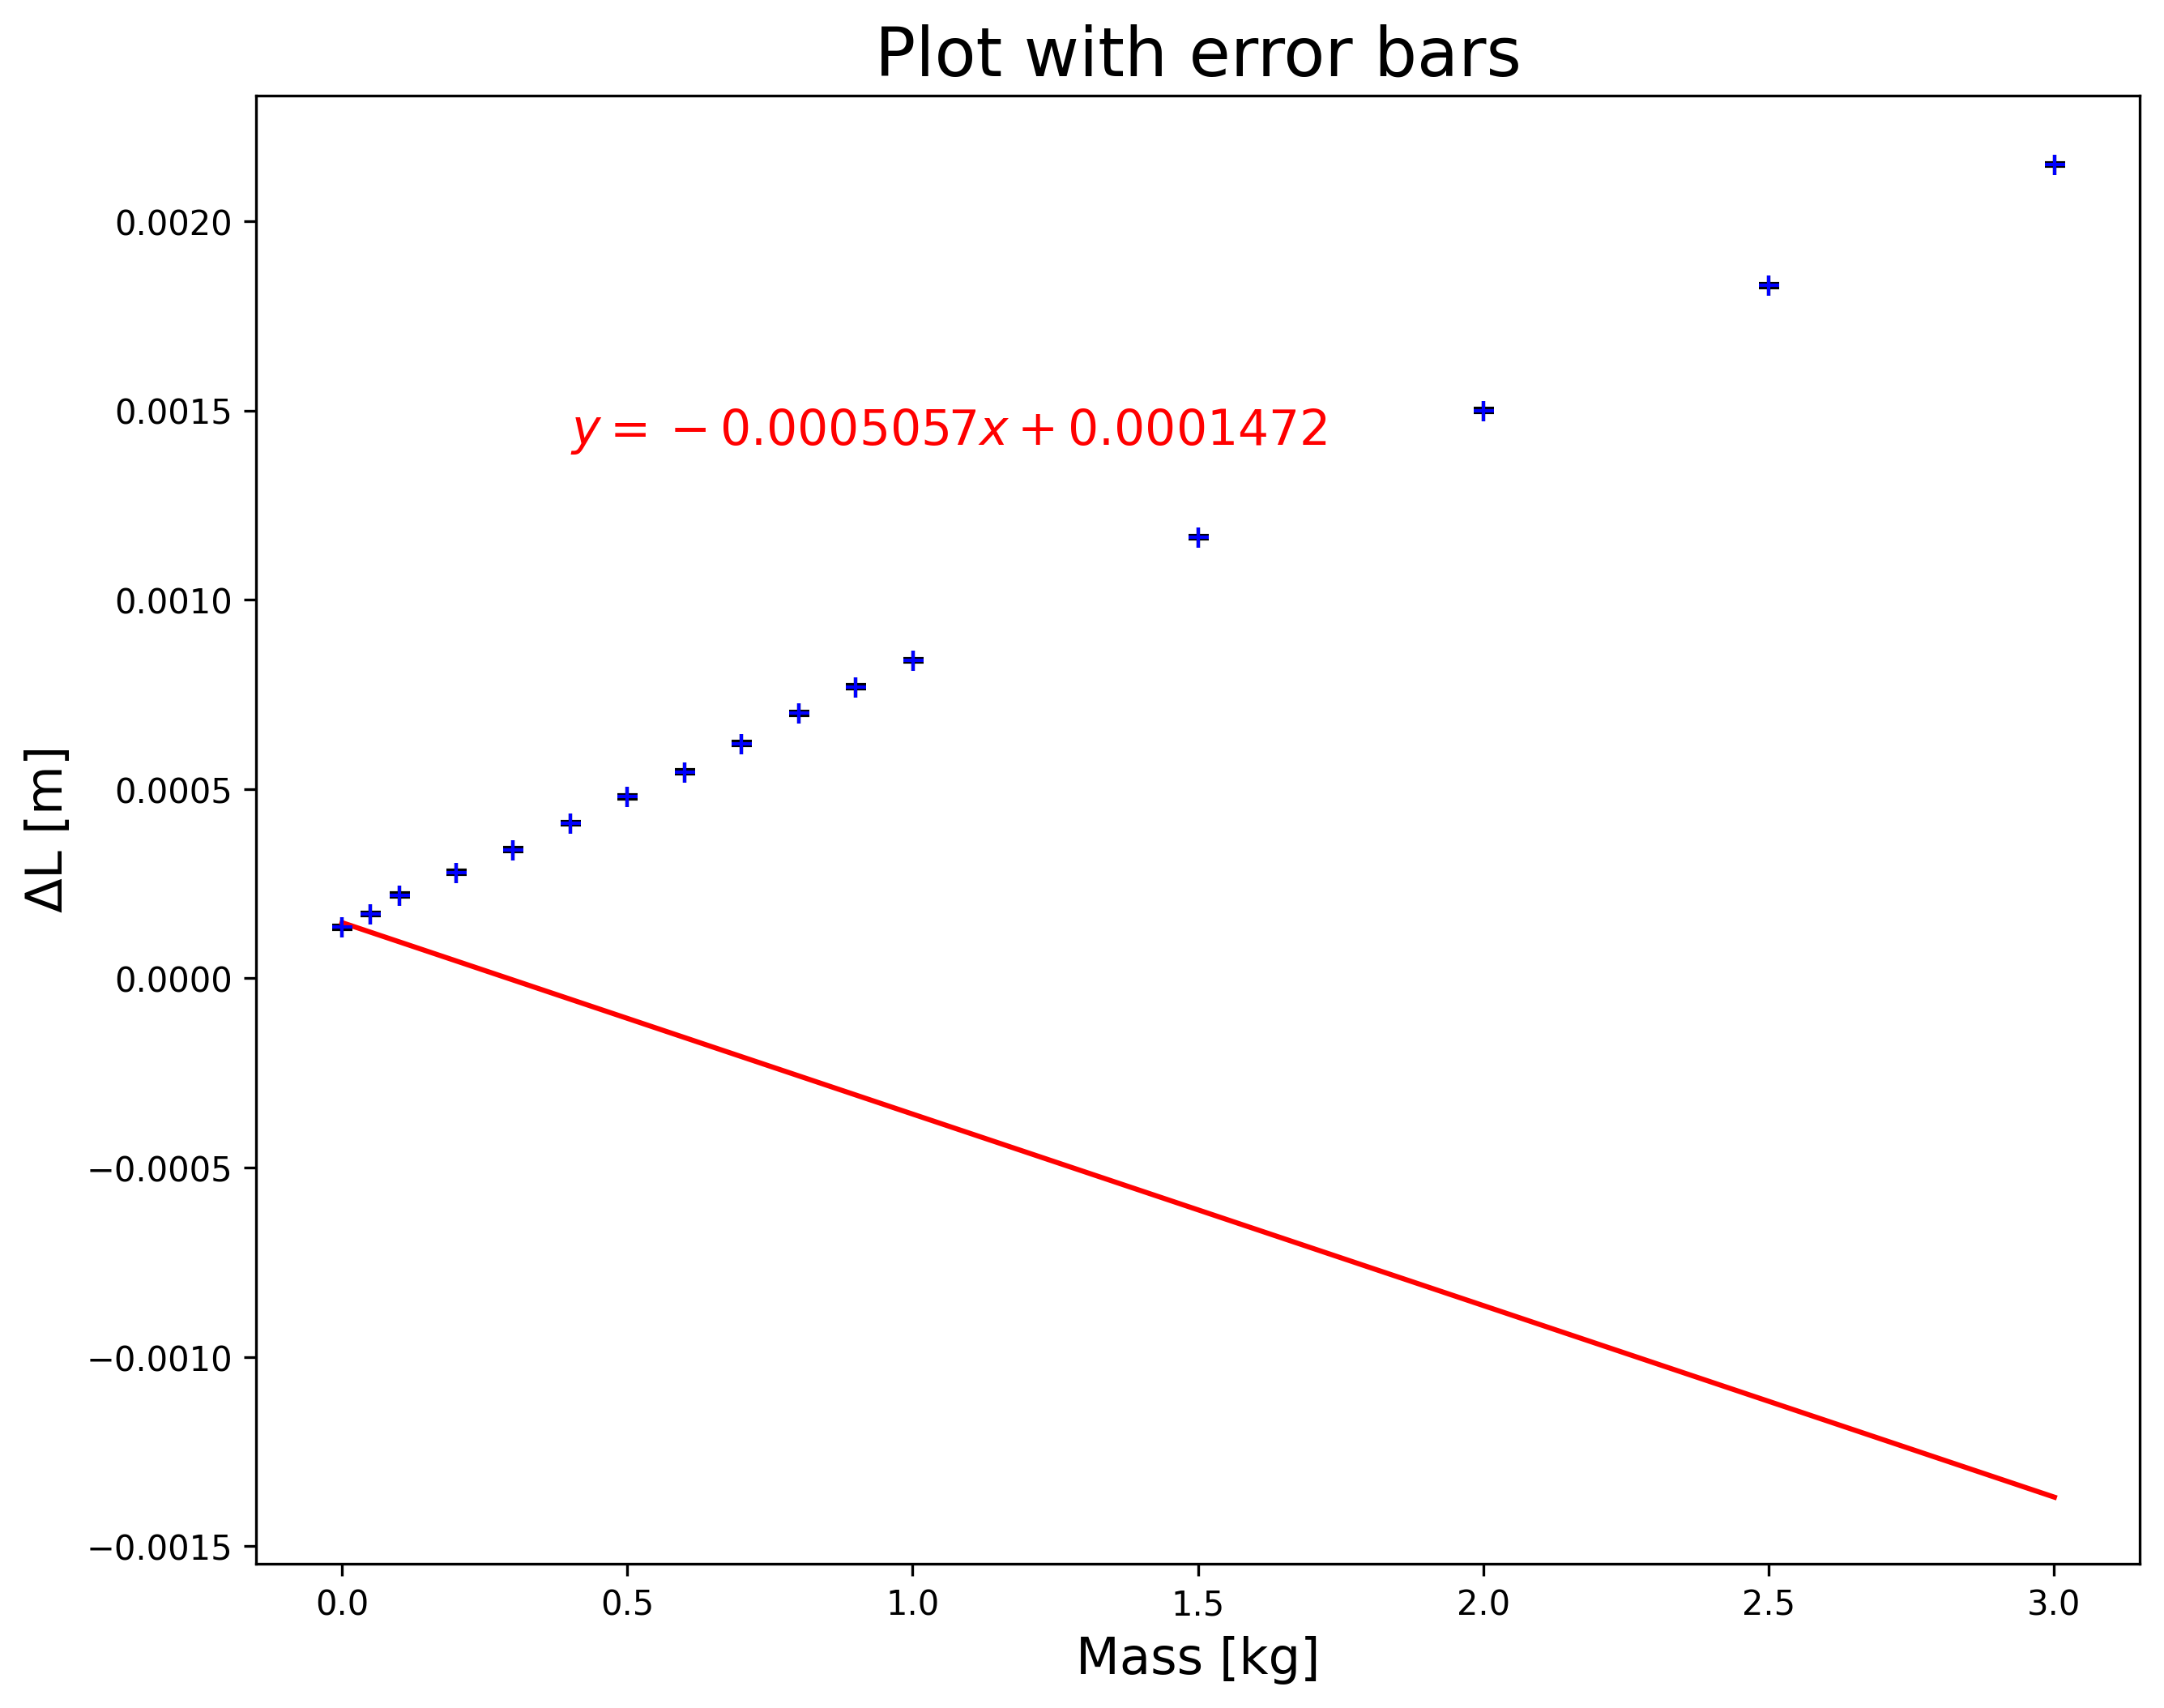

In [96]:
# Attempting to plot descending weights
X2 = np.flip(X)
X2_error = np.flip(X_error)
d_lraw2 = np.array([2.15, 1.83, 1.5, 1.165, 0.84, 0.77, 0.70, 0.62, 0.545, 0.48, 0.41, 0.34, 0.28, 0.22, 0.17, 0.135]) #raw readings from micrometer in mm
d_l2 = [e/1000 for e in d_lraw2] # converting raw readings to m

N = len(X2)
Delta = N*sum(X2**2)-(sum(X2))**2

A = (sum(X2**2)*sum(d_l2)-sum(X2)*sum(X2*d_l2))/Delta
B = (N*sum(X*d_l2)-sum(X2)*sum(d_l2))/Delta

plt.figure(figsize=(10,8))

#Plot the points with error bars
plt.errorbar(X2, d_l2, yerr=l_error, xerr=X2_error, fmt='b+', ecolor='k',capsize=3)

#plotting fitted line
plt.plot(X2, A+B*X2, 'r', label="Straight line fit")
plt.text(X2[10], d_l2[10]+0.001, f"$y={round(B, 7)}x+{round(A, 7)}$", color='r', size='x-large')

#plt.gca().invert_xaxis() # inverting x axis because for some reason it isn't descending by default
plt.title('Plot with error bars', fontsize=20)
plt.xlabel('Mass [kg]', fontsize=15)
plt.ylabel('$\Delta$L [m]', fontsize=15)
plt.show()

<div>
<b>Dynamic method</b>

Steel wire hung from the ceiling has a cylinder attached. The cylinder has the label 6949 +/- 1g. To the part connecting the wire and the cylinder the accelerometer is attached which is connected to a power supply.
</br>
Also an oscilloscope, rubber mallet, stopwatch, micrometer, sheet for the accelerometer and oscilloscope is set up next to the wire.
</br>
The silver cylindrical cap on the accelerometer chip reads: 9055, 251030, A0XL05JA, 97703AA
</br>
Measuring the length of the wire: End of two meter stick from top of ceiling is marked on the wire with a piece of tape. Next, from the bottom up to see where the meter stick overlaps the tape. Result : 290.1cm or 2.901m
</br>
Next three measurements of the wire diameter with the micrometer were made in mm (0.005mm error):
<p>0.775, 0.785, 0.87<p>
The chip is connected to a small black box with a BNC connector for the oscilloscope and a + / - for power from the Physics Rm400 5VDC power supply. The oscilloscope is turned on using a 50mV scale and a cursor set to time.
</br>
First strike of the rubber mallet to the bottom of the cylinder: creating on the oscilloscope screen first a big spike and then very quickly turning into a uniform slowly decaying wave. Then we press the "Run / Stop" button which freezes the wave.
</br>
Raw measurements can be seen below
</div>

![ex 2.13](4.jpg)
![ex 2.13](5.jpg)
![ex 2.13](6.jpg)

In [100]:
# Calculations
diam = np.array([0.775, 0.785, 0.87])
r = (np.average(diam)/2)/1000  # get radius and convert to m
Delta_r = 0.005/1000 # converting error to m

length = 2.901 # in m
length_error = 0.005 # an assumption in m

h = 10e-5

dAdr = (A(r + h) - A(r - h))/(2*h)
Delta_A = dAdr*Delta_r

def omega(dT, peaks): return 2*np.pi*(1/(dT/(peaks + 1)))

timings_raw = np.array([928, 840, 936, 920, 932, 924]) # in ms
timings = [t/1000 for t in timings_raw] # converting to seconds
peaks = np.array([9, 8, 9, 9, 9, 9])

#Getting a rough first E

avg_omega = np.average(omega(timings, peaks))

#print(avg_omega)

mass = 6949/1000 #in g converting to kg
E = ((avg_omega**2)*mass*length)/(A(r))
print("Rough first estimate of E")
print(round(E), " Pa")
print(round(E/1e9), " GPa")

Rough first estimate of E
179008315902  Pa
179  GPa


<div>
<b>Dynamic method decay time</b>

Using the oscilloscope we measure the time it takes for the oscillation to decay --> direct measure of the quality factor Q. More specifically we will measure the time it takes for the amplitude to decay by a factor of 1/2.
    
</br>
This will be done by striking the cylinder as before and then using two horizontal lines set on the oscilloscope to 120mV and 60mV and measuring with the stopwatch on my phone (OnePlus 9 standard clock app) the time it takes for thr wave to go just below the 60mV line. The timer starts just below the 120mV line. This will introduce some human error by manually operating the stopwatch.

</br>
Multiple measurements done to get mean and standard error for the best estimate of time and uncertainty.

<p>Measurements saved in numpy array</p>

</div>

In [93]:
decay_array = np.array([18.88, 19.98, 19.69, 18.93, 20.24, 19.39]) # in seconds
decay = np.average(decay_array)
print("Average decay time is", round(decay, 2))

Average decay time is 19.52
